In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, SGD
# Plot
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

import os

path = '/content/drive/My Drive/Colab Notebooks/Mini-Projet/sensor_data_processed_normalizing_the_label_with_hot_encoding_timestamps_normalizing.csv'

data = pd.read_csv(path, index_col='Time',parse_dates=True)

training_labels = ['Timestamps','bedroom_switch_middle_left',
 'entrance_heater_effective_setpoint',
 'bedroom_switch_middle_right',
 'kitchen_noise',
 'livingroom_couch_plug_consumption',
 'global_snow_ext',
 'bedroom_heater1_effective_setpoint',
 'global_lighting_power',
 'livingroom_heater2_base_setpoint',
 'kitchen_dishwasher_current',
 'toilet_coldwater_total',
 'kitchen_hood_voltage',
 'kitchen_washingmachine_partial_energy',
 'walkway_switch2_bottom_left',
 'livingroom_shutter5',
 'kitchen_hood_total_energy',
 'bathroom_heater_command',
 'walkway_noise',
 'entrance_noise',
 'livingroom_shutter4',
 'livingroom_switch2_top_left',
 'global_rain_ext',
 'global_wind_speed_ext',
 'global_waterheater_total_energy',
 'global_lighting_current',
 'livingroom_heater2_temperature',
 'livingroom_tv_status',
 'office_tv_plug_consumption',
 'kitchen_fridge_power',
 'bedroom_closet_door',
 'bathroom_luminosity',
 'livingroom_tv_plug_consumption',
 'office_AC_setpoint',
 'bathroom_switch_bottom_right',
 'bedroom_light4',
 'office_heater_effective_mode',
 'global_lighting_total_energy',
 'kitchen_cupboard3',
 'toilet_switch_left',
 'entrance_heater_base_setpoint',
 'office_heater_command',
 'bedroom_light2',
 'livingroom_table_luminosity',
 'global_voltage',
 'bedroom_temperature',
 'kitchen_fridge_door',
 'bathroom_sink_coldwater_total',
 'global_lighting_partial_energy',
 'livingroom_couch_noise',
 'global_temperature_feel_ext',
 'livingroom_humidity',
 'kitchen_oven_current',
 'livingroom_presence_table',
 'bathroom_switch_bottom_left',
 'livingroom_heater1_command',
 'staircase_light',
 'office_noise',
 'kitchen_sink_hotwater_total',
 'bathroom_switch_top_right',
 'bedroom_switch_bottom_left',
 'livingroom_presence_couch',
 'livingroom_heater2_effective_setpoint',
 'bedroom_presence',
 'toilet_switch_right',
 'bedroom_humidity',
 'livingroom_heater1_effective_mode',
 'bedroom_heater2_effective_setpoint',
 'livingroom_heater2_command',
 'bedroom_shutter1',
 'global_active_power',
 'walkway_switch1_bottom_left',
 'kitchen_hood_current',
 'entrance_heater_temperature',
 'bedroom_CO2',
 'livingroom_table_plug_consumption',
 'bathroom_CO2',
 'bathroom_temperature',
 'bedroom_drawer1',
 'office_switch_right',
 'global_heaters_temperature',
 'global_waterheater_current',
 'kitchen_dishwasher_voltage',
 'global_shutters_voltage',
 'walkway_switch1_bottom_right',
 'livingroom_heater1_effective_setpoint',
 'livingroom_light1',
 'bathroom_heater_temperature',
 'kitchen_cooktop_current',
 'entrance_switch_left',
 'toilet_coldwater_instantaneous',
 'kitchen_oven_voltage',
 'bathroom_sink_hotwater_instantaneous',
 'staircase_switch_right',
 'kitchen_sink_coldwater_instantaneous',
 'livingroom_heater2_effective_mode',
 'office_tv_status',
 'global_shutters_current',
 'kitchen_fridge_current',
 'kitchen_washingmachine_total_energy',
 'bedroom_shutter2',
 'bathroom_light2',
 'global_waterheater_partial_energy',
 'global_frequency',
 'kitchen_switch_bottom_right',
 'bedroom_door',
 'kitchen_luminosity',
 'bedroom_heater2_command',
 'entrance_heater_command',
 'global_pressure_ext',
 'kitchen_oven_partial_energy',
 'global_shutters_power',
 'office_luminosity',
 'kitchen_cooktop_total_energy',
 'kitchen_washingmachine_voltage',
 'bathroom_light1',
 'bedroom_luminosity',
 'office_presence',
 'bathroom_heater_effective_setpoint',
 'bathroom_shower_hotwater_instantaneous',
 'livingroom_switch1_top_left',
 'bathroom_humidity',
 'kitchen_cupboard5',
 'bathroom_shower_coldwater_total',
 'bathroom_shower_coldwater_instantaneous',
 'office_window',
 'kitchen_switch_bottom_left',
 'kitchen_dishwasher_partial_energy',
 'kitchen_fridge_voltage',
 'office_heater_effective_setpoint',
 'office_heater_temperature',
 'livingroom_window1',
 'bathroom_sink_hotwater_total',
 'kitchen_cooktop_voltage',
 'kitchen_hood_power',
 'kitchen_sink_hotwater_instantaneous',
 'global_current',
 'global_condition_id_ext',
 'livingroom_switch1_top_right',
 'office_AC_mode',
 'bedroom_heater2_effective_mode',
 'walkway_light',
 'bathroom_door',
 'global_clouds_ext',
 'global_shutters_total_energy',
 'bedroom_heater1_effective_mode',
 'bedroom_light1',
 'kitchen_cupboard1',
 'livingroom_temperature',
 'livingroom_CO2',
 'global_shutters_partial_energy',
 'bathroom_shower_hotwater_total',
 'kitchen_switch_top_right',
 'kitchen_cooktop_partial_energy',
 'global_waterheater_power',
 'kitchen_sink_coldwater_total',
 'kitchen_oven_total_energy',
 'global_power_factor',
 'kitchen_washingmachine_current',
 'global_coldwater_instantaneous',
 'office_desk_plug_consumption',
 'livingroom_switch1_bottom_left',
 'entrance_door',
 'global_active_energy',
 'global_coldwater_total',
 'bathroom_heater_effective_mode',
 'office_light',
 'walkway_switch1_top_right',
 'global_humidity_ext',
 'livingroom_AC_setpoint',
 'walkway_switch2_top_right',
 'bathroom_switch_top_left',
 'kitchen_cupboard2',
 'office_heater_base_setpoint',
 'bedroom_light3',
 'kitchen_dishwasher_total_energy',
 'livingroom_shutter3',
 'kitchen_light2',
 'kitchen_cooktop_power',
 'office_switch_left',
 'toilet_light',
 'livingroom_shutter2',
 'bathroom_presence',
 'livingroom_light2',
 'bedroom_switch_top_right',
 'livingroom_heater1_temperature',
 'bedroom_switch_top_left',
 'walkway_switch1_top_left',
 'livingroom_switch2_top_right',
 'walkway_switch2_bottom_right',
 'kitchen_dishwasher_power',
 'global_heaters_setpoint',
 'bedroom_AC_setpoint',
 'kitchen_temperature',
 'bedroom_heater2_temperature',
 'kitchen_fridge_partial_energy',
 'bedroom_switch_bottom_right',
 'office_shutter',
 'bedroom_drawer2',
 'global_temperature_ext',
 'bedroom_heater1_command',
 'bathroom_heater_base_setpoint',
 'bedroom_bed_pressure',
 'livingroom_table_noise',
 'global_lighting_voltage',
 'office_switch_middle',
 'global_gas_total',
 'global_waterheater_status',
 'office_door',
 'kitchen_washingmachine_power',
 'staircase_switch_left',
 'bedroom_heater2_base_setpoint',
 'entrance_heater_effective_mode',
 'bedroom_heater1_temperature',
 'entrance_light1',
 'livingroom_shutter1',
 'livingroom_heater1_base_setpoint',
 'kitchen_CO2',
 'walkway_switch2_top_left',
 'kitchen_switch_top_left',
 'kitchen_fridge_total_energy',
 'bathroom_shower_door',
 'bedroom_heater1_base_setpoint',
 'kitchen_light1',
 'kitchen_hood_partial_energy',
 'global_waterheater_voltage',
 'kitchen_cupboard4',
 'bathroom_sink_coldwater_instantaneous',
 'bedroom_noise',
 'kitchen_humidity',
 'kitchen_oven_power',
 'kitchen_presence',
 'livingroom_luminosity',
 'E',
 'ENE',
 'ESE',
 'N',
 'NE',
 'NNE',
 'NNW',
 'NW',
 'S',
 'SE',
 'SSE',
 'SSW',
 'SW',
 'W',
 'WNW',
 'WSW',
 'down',
 'equal',
 'up',
 'Couvert',
 'brouillard',
 'brume',
 'ensoleillé',
 'légères pluies',
 'nuageux',
 'partiellement ensoleillé',
 'peu nuageux',
 'cloudy',
 'few-showers',
 'fog',
 'mostly-cloudy-day',
 'partly-cloudy-day',
 'sunny']

classes_labels = ['Bathroom|Cleaning',
 'Bathroom|Showering',
 'Bathroom|Using_the_sink',
 'Bathroom|Using_the_toilet',
 'Bedroom|Cleaning',
 'Bedroom|Dressing',
 'Bedroom|Napping',
 'Bedroom|Reading',
 'Entrance|Entering',
 'Entrance|Leaving',
 'Kitchen|Cleaning',
 'Kitchen|Cooking',
 'Kitchen|Preparing',
 'Kitchen|Washing_the_dishes',
 'Living_room|Cleaning',
 'Living_room|Computing',
 'Living_room|Eating',
 'Living_room|Watching_TV',
 'Office|Cleaning',
 'Office|Computing',
 'Office|Watching_TV',
 'Staircase|Going_down',
 'Staircase|Going_up',
 'Toilet|Using_the_toilet',
 'Transition']


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
X = data[training_labels]
y = data[classes_labels]
y = y.values
X = X.values

In [96]:
from sklearn.decomposition import PCA

In [97]:
pca=PCA(n_components=200)

In [98]:
pca.fit(X)

PCA(n_components=200)

In [99]:
x_pca=pca.transform(X)

In [100]:
X.shape

(383714, 266)

In [101]:
x_pca.shape

(383714, 200)

In [102]:
from sklearn.model_selection import train_test_split

x_pca = np.reshape(x_pca, (x_pca.shape[0], x_pca.shape[1], 1))

x_train, x_test, y_train, y_test = train_test_split(x_pca,y, test_size = 0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test,y_test, test_size = 0.3)

In [103]:
x_train.shape[1]

200

# GRU Model Building

In [104]:
from keras.models import Sequential
from keras.layers import Dense,LSTM, Dropout, InputLayer, GRU
from keras.optimizers import RMSprop, SGD, Adam

import matplotlib.pyplot as plt
import os
os.environ['TF_ENABLE_CUDNN'] = '1'

from keras.layers import CuDNNLSTM



# hyper-parameters
num_classes = 25
input_shape = (x_train.shape[1],)
hidden_nodes= (x_train.shape[1]+num_classes)/2
input_nodes = x_train.shape[1]

model = Sequential()
# first layer with 
model.add(InputLayer((x_train.shape[1], 1)))
model.add(Dense(int(input_nodes), activation='tanh'))


#model.add(LSTM(int(input_nodes), activation='tanh', return_sequences=True))
model.add(GRU(int(input_nodes), activation='tanh'))
#model.add(LSTM(int(hidden_nodes), activation='tanh'))

# Dropout of 50%
model.add(Dropout(0.5))

# L
model.add(Dense(hidden_nodes, activation='tanh'))

#model.add(Dense(int(hidden_nodes/2), activation='tanh'))


# Classification Layer 
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 200, 200)          400       
                                                                 
 gru_3 (GRU)                 (None, 200)               241200    
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_10 (Dense)            (None, 112)               22512     
                                                                 
 dense_11 (Dense)            (None, 25)                2825      
                                                                 
Total params: 266,937
Trainable params: 266,937
Non-trainable params: 0
_________________________________________________________________


In [105]:
sgd = SGD(learning_rate=0.05,  momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [106]:
batch_size = 34
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/10
7900/7900 [==============================] - 123s 15ms/step - loss: 1.0835 - accuracy: 0.7446 - val_loss: 0.2217 - val_accuracy: 0.9305
Epoch 2/10
7900/7900 [==============================] - 118s 15ms/step - loss: 0.1667 - accuracy: 0.9488 - val_loss: 0.1147 - val_accuracy: 0.9649
Epoch 3/10
7900/7900 [==============================] - 119s 15ms/step - loss: 0.1121 - accuracy: 0.9656 - val_loss: 0.0966 - val_accuracy: 0.9717
Epoch 4/10
7900/7900 [==============================] - 113s 14ms/step - loss: 0.0926 - accuracy: 0.9707 - val_loss: 0.0846 - val_accuracy: 0.9731
Epoch 5/10
7900/7900 [==============================] - 114s 14ms/step - loss: 0.0842 - accuracy: 0.9743 - val_loss: 0.0749 - val_accuracy: 0.9764
Epoch 6/10
7900/7900 [==============================] - 117s 15ms/step - loss: 0.0813 - accuracy: 0.9746 - val_loss: 0.0752 - val_accuracy: 0.9769
Epoch 7/10
7900/7900 [==============================] - 114s 14ms/step - loss: 0.0789 - accuracy: 0.9754 - val_loss: 0

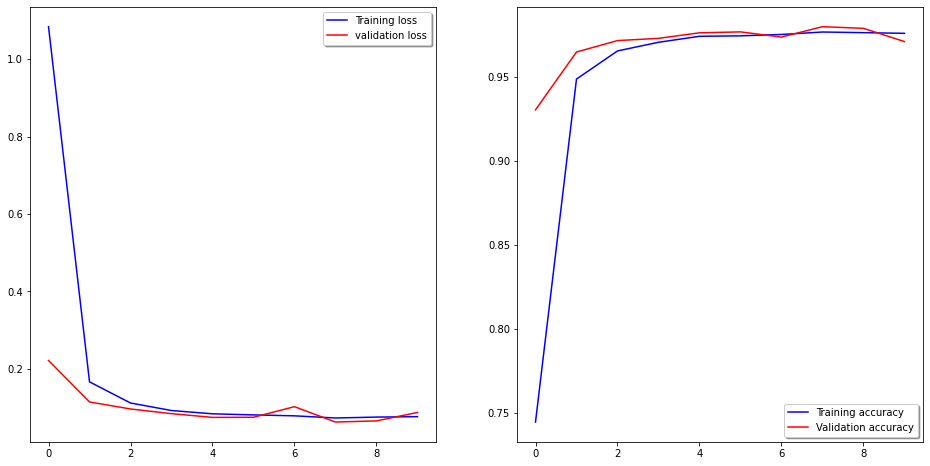

In [107]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [108]:
from sklearn.metrics import classification_report, confusion_matrix

score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08768732100725174
Test accuracy: 0.9711596965789795


In [109]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0897824615240097
Test accuracy: 0.971332848072052


In [110]:
# Classification
y_pred = model.predict(x_test)

y_pred

2519/2519 [==============================] - 14s 5ms/step


array([[1.1210756e-08, 1.8783045e-06, 3.9625928e-07, ..., 1.2572598e-06,
        3.0637866e-09, 5.6385044e-05],
       [7.3223241e-09, 1.5034137e-06, 4.1543200e-07, ..., 9.1419935e-07,
        2.0060278e-09, 6.8850408e-05],
       [1.9753779e-06, 9.9218154e-01, 6.9343322e-03, ..., 1.0012375e-05,
        1.1173223e-07, 5.3820643e-04],
       ...,
       [7.8466407e-09, 1.4382006e-06, 4.1028522e-07, ..., 9.9734359e-07,
        1.8688948e-09, 6.3180392e-05],
       [6.4475439e-06, 1.6665257e-07, 3.2062340e-07, ..., 1.0332839e-06,
        1.1816508e-06, 3.5148923e-06],
       [7.4069728e-09, 1.6085977e-06, 4.1833758e-07, ..., 9.7296083e-07,
        2.0360882e-09, 6.7446024e-05]], dtype=float32)

In [111]:
for i in range(0,len(y_pred)):
# Get the index of the maximum value in the output list
  max_index = np.argmax(y_pred[i])
  # Create a binary vector with the maximum value as 1 and other values as 0
  y_pred[i] = np.zeros(len(y_pred[i]))

  y_pred[i][max_index] = 1

In [112]:
labels = ['Bathroom|Cleaning',
 'Bathroom|Showering',
 'Bathroom|Using_the_sink',
 'Bathroom|Using_the_toilet',
 'Bedroom|Cleaning',
 'Bedroom|Dressing',
 'Bedroom|Napping',
 'Bedroom|Reading',
 'Entrance|Entering',
 'Entrance|Leaving',
 'Kitchen|Cleaning',
 'Kitchen|Cooking',
 'Kitchen|Preparing',
 'Kitchen|Washing_the_dishes',
 'Living_room|Cleaning',
 'Living_room|Computing',
 'Living_room|Eating',
 'Living_room|Watching_TV',
 'Office|Cleaning',
 'Office|Computing',
 'Office|Watching_TV',
 'Staircase|Going_down',
 'Staircase|Going_up',
 'Toilet|Using_the_toilet',
 'Transition']

In [113]:
df_pred = pd.DataFrame( y_pred,columns=labels)

In [114]:
df_pred

,Bathroom|Cleaning,Bathroom|Showering,Bathroom|Using_the_sink,Bathroom|Using_the_toilet,Bedroom|Cleaning,Bedroom|Dressing,Bedroom|Napping,Bedroom|Reading,Entrance|Entering,Entrance|Leaving,...,Living_room|Computing,Living_room|Eating,Living_room|Watching_TV,Office|Cleaning,Office|Computing,Office|Watching_TV,Staircase|Going_down,Staircase|Going_up,Toilet|Using_the_toilet,Transition
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
80577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
80578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [115]:
original_array_pred = df_pred.idxmax(axis=1)

In [116]:
original_array_pred

0            Office|Computing
1            Office|Computing
2          Bathroom|Showering
3             Bedroom|Napping
4        Living_room|Cleaning
                 ...         
80575         Bedroom|Reading
80576        Office|Computing
80577        Office|Computing
80578      Office|Watching_TV
80579        Office|Computing
Length: 80580, dtype: object

In [117]:
df_test = pd.DataFrame( y_test,columns=labels)
original_array_test = df_test.idxmax(axis=1)
original_array_test

0          Office|Computing
1          Office|Computing
2        Bathroom|Showering
3           Bedroom|Napping
4        Living_room|Eating
                ...        
80575       Bedroom|Reading
80576      Office|Computing
80577      Office|Computing
80578    Office|Watching_TV
80579      Office|Computing
Length: 80580, dtype: object

In [118]:
cm = confusion_matrix(original_array_test,original_array_pred)

In [119]:
df_cm = pd.DataFrame( cm,columns=labels, index=labels)

In [120]:
df_cm

,Bathroom|Cleaning,Bathroom|Showering,Bathroom|Using_the_sink,Bathroom|Using_the_toilet,Bedroom|Cleaning,Bedroom|Dressing,Bedroom|Napping,Bedroom|Reading,Entrance|Entering,Entrance|Leaving,...,Living_room|Computing,Living_room|Eating,Living_room|Watching_TV,Office|Cleaning,Office|Computing,Office|Watching_TV,Staircase|Going_down,Staircase|Going_up,Toilet|Using_the_toilet,Transition
Bathroom|Cleaning,107,0,1,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,2,0,2
Bathroom|Showering,0,2309,332,2,0,0,0,0,1,0,...,0,0,2,0,0,0,2,1,0,10
Bathroom|Using_the_sink,52,63,723,40,0,0,0,0,1,0,...,0,4,2,0,0,0,4,0,0,2
Bathroom|Using_the_toilet,7,27,12,213,0,2,0,0,0,0,...,0,0,0,1,1,0,2,0,0,0
Bedroom|Cleaning,0,0,0,0,41,12,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Bedroom|Dressing,0,0,1,0,4,279,7,6,3,0,...,0,2,0,0,0,0,1,0,0,2
Bedroom|Napping,0,0,0,0,0,17,2660,0,0,0,...,102,73,0,0,39,0,0,0,0,52
Bedroom|Reading,0,0,0,0,1,20,0,3225,0,0,...,0,0,0,0,0,0,0,0,0,0
Entrance|Entering,0,1,1,0,0,0,0,0,314,2,...,0,0,0,0,0,0,2,0,0,12
Entrance|Leaving,0,0,0,0,0,1,0,0,53,132,...,0,0,0,0,0,1,2,0,0,8


In [121]:
df_cm.to_csv("confusion_matrix_GRU_PCA_200.csv",index=True)

In [122]:
# y_true and y_pred are your true and predicted labels, respectively
report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)

# Calculate the weighted average of precision, recall, and F1 score
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

In [123]:
weights = np.sum(y_test, axis=0)
precision_weighted = np.sum(precision * weights) / np.sum(weights)
recall_weighted = np.sum(recall * weights) / np.sum(weights)
f1_score_weighted = np.sum(f1_score * weights) / np.sum(weights)

print("Precision:", precision_weighted)
print("Recall:", recall_weighted)
print("F1 score:", f1_score_weighted)

Precision: 0.973859099439121
Recall: 0.971332836932241
F1 score: 0.9716635157326502


In [124]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9713328369322413
